2011-1-5 2011-1-31
2011-2-1 2011-2-28
2011-3-1 2011-3-31
2011-4-4 2011-4-30
2011-5-6 2011-5-31
2011-6-2 2011-6-30
2011-7-4 2011-7-31
2011-8-1 2011-8-31
2011-9-3 2011-9-30
2011-10-5 2011-10-31
2011-11-1 2011-11-30
2011-12-3 2011-12-31


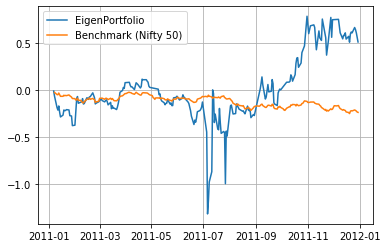

In [315]:
import pandas as pd
import datetime as dt
from datetime import datetime
import eikon as ek
import calendar
import numpy as np
import warnings
warnings.filterwarnings("ignore")


ek.set_app_key('APP_KEY')

Universe = ['RELI.NS','TCS.NS','HDBK.NS','HLL.NS','INFY.NS',
            'HDFC.NS','KTKM.NS','BRTI.NS','HCLT.NS','ITC.NS',]


daily_returns = pd.DataFrame()

YEAR = 2011

start_date = str(YEAR-1) + '-12-01'
end_date = str(YEAR-1) + '-12-31'

# Universe = get_top_rics_by_mktcap(10,start_date)

prices = ek.get_timeseries(rics=Universe,fields=['CLOSE'],
                            start_date=start_date,
                            end_date=end_date,
                            interval='daily',corax='adjusted')
returns = prices.pct_change()

# returns = np.log(prices) - np.log(prices.shift(1))


returns = returns.iloc[1:, :]

portwts = Get_EigenPort_Weights(returns)


for i in range(12):
    start_date = str(YEAR)+str("-")+str(i+1)+str("-") + str(max(calendar.monthrange(YEAR,i+1)[0],1))
    end_date =  str(YEAR)+str("-")+str(i+1)+str("-") + str(calendar.monthrange(YEAR,i+1)[1])
    
    print(start_date,end_date)

    #To Show Plots
#     portwts.plot(kind='bar', legend=False)
#     plt.title("Second E.V. Eigenportfolio")
#     plt.show()
    
    prices = ek.get_timeseries(rics=Universe,fields=['CLOSE'],
                            start_date=start_date,
                            end_date=end_date,
                            interval='daily',corax='adjusted')
    
    returns = prices.pct_change()
    returns = returns.iloc[1:, :]
    
#     portwts.loc[portwts['Investment Weight'] < 0] = 0 
#     portwts = portwts/portwts.sum()
    if(i > 0):
        
        rets = get_cumulative_returns_over_time(returns,portwts) + (daily_returns.values[-1][0])
    else:
        rets = get_cumulative_returns_over_time(returns,portwts)
        
    daily_returns = daily_returns.append(rets)
    
    
#     Universe = get_top_rics_by_mktcap(10,start_date)
    portwts = Get_EigenPort_Weights(returns)
    

    
nifty = ek.get_timeseries(rics=['.NSEI'],fields=['CLOSE'],
                            start_date=str(daily_returns.index[0].date()),
                            end_date=str(daily_returns.index[-1].date()),
                            interval='daily',corax='adjusted')
indexreturns = nifty.pct_change()
indexreturns = indexreturns.iloc[1:, :]


plt.plot(daily_returns,label='EigenPortfolio')
plt.plot((((1+indexreturns).cumprod(axis=0))-1),label='Benchmark (Nifty 50)')
plt.grid()
plt.legend()



In [244]:
def get_top_rics_by_mktcap(top,date):
    return ek.get_data("0#.NSEI","TR.CompanyMarketCap",{'Sdate':date})[0].sort_values(by='Company Market Cap',ascending=False).Instrument[:top].tolist()

def get_cumulative_returns_over_time(sample, weights):
    return (((1+sample).cumprod(axis=0))-1).dot(weights)


In [324]:
S[:-3]

array([[ 0.49739349, -0.16554022,  0.10794018, -0.64153845,  0.04277509,
         0.19637179, -0.42093002,  0.13691365,  0.17385526, -0.18822543],
       [ 0.12801062, -0.43404935, -0.6758845 , -0.02647847,  0.16227942,
         0.13210865,  0.22951138,  0.25209499, -0.40726566, -0.1086899 ],
       [ 0.42389975,  0.31399699,  0.01441719,  0.15982779,  0.22046374,
        -0.57544022, -0.29214384,  0.02569921, -0.47961502, -0.01368794],
       [ 0.22018702, -0.10639038, -0.08419335, -0.02882816, -0.15596734,
         0.26954342, -0.14600401, -0.52120756, -0.24112393,  0.69583365],
       [-0.03020685,  0.00183107, -0.5673533 ,  0.06344943, -0.52351288,
        -0.32883345, -0.34380333, -0.19526319,  0.33566676, -0.14822555],
       [ 0.56589074,  0.26828208,  0.06497507,  0.12620222, -0.46435798,
         0.19311476,  0.5106049 , -0.07035704, -0.0326954 , -0.26074035],
       [ 0.40262991, -0.07260374, -0.10899061,  0.49998444,  0.31779164,
         0.07001943, -0.03612055,  0.25401608

In [300]:
def Get_EigenPort_Weights(data):
    universe = data.columns.tolist()

    covariance_matrix = data.cov()

    D, S = np.linalg.eigh(np.linalg.inv(covariance_matrix))
    S = np.reciprocal(S)
#     SharpeList = []

#     for i in range(len(S)):
#         eigenportfolio_1 = S[:,-i] / np.sum(S[:,-i]) # Normalize to sum to 1
#         eigenportfolio = pd.DataFrame(data= eigenportfolio_1, columns = ['Investment Weight'], index = universe)
#         cumulative_returns = get_cumulative_returns_over_time(data, eigenportfolio).values
#         SharpeList.append(np.std(cumulative_returns))     #For MinVar Port
#         SharpeList.append(cumulative_returns[-1][0]/np.std(cumulative_returns))    
    
    
#     eigenportfolio_final = S[:,-np.argmin(SharpeList)] / np.sum(S[:,-np.argmin(SharpeList)]) #For MinVar Port
#     eigenportfolio_final = S[:,-np.argmax(SharpeList)] / np.sum(S[:,-np.argmax(SharpeList)]) # Normalize to sum to 1
    eigenportfolio_final = (S[:,-1] / np.sum(S[:,-1])) + (S[:,-2] / np.sum(S[:,-2]))  + (S[:,-3] / np.sum(S[:,-3]))                                  # For 'N'th eigenvalue portfolio

    eigenportfolio = pd.DataFrame(data= eigenportfolio_final, columns = ['Investment Weight'], index = universe)
    return eigenportfolio

def Get_EigenPort_Weights_MV(data):

    universe = data.columns.tolist()

    covariance_matrix = data.cov()

    inv_cov_mat = np.linalg.pinv(covariance_matrix) # Use pseudo-inverse incase matrix is singular / ill-conditioned
    
    # Construct minimum variance weights
    ones = np.ones(len(inv_cov_mat))
    inv_dot_ones = np.dot(inv_cov_mat, ones)
    min_var_weights = inv_dot_ones/ np.dot( inv_dot_ones , ones)
    
    min_var_portfolio = pd.DataFrame(data= min_var_weights, columns = ['Investment Weight'], index = universe)

    return min_var_portfolio


In [94]:
(get_cumulative_returns_over_time(returns, eigenportfolio))


,Investment Weight
Date,
2020-04-03,0.096316
2020-04-07,0.325659
2020-04-08,-0.148173
2020-04-09,-0.485422
2020-04-13,-0.322912
...,...
2020-07-27,-5.213650
2020-07-28,-5.420219
2020-07-29,-5.012118


Text(0.5, 1.0, '2nd E.V. Eigenportfolio')

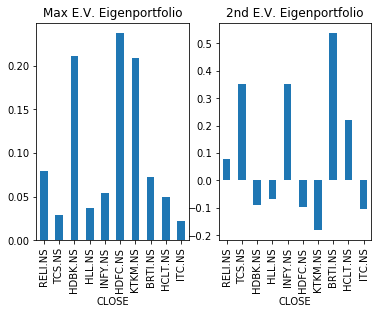

In [44]:
import numpy as np

covariance_matrix = in_sample.cov()

D, S = np.linalg.eigh(covariance_matrix)

eigenportfolio_1 = S[:,-1] / np.sum(S[:,-1]) # Normalize to sum to 1

eigenportfolio_2 = S[:,-2] / np.sum(S[:,-2]) # Normalize to sum to 1


# Setup Portfolios
eigenportfolio = pd.DataFrame(data= eigenportfolio_1, columns = ['Investment Weight'], index = tickers)
eigenportfolio2 = pd.DataFrame(data= eigenportfolio_2, columns = ['Investment Weight'], index = tickers)

# Plot
%matplotlib inline
import matplotlib.pyplot as plt
f = plt.figure()

ax = plt.subplot(121)
eigenportfolio.plot(kind='bar', ax=ax, legend=False)
plt.title("Max E.V. Eigenportfolio")
ax = plt.subplot(122)
eigenportfolio2.plot(kind='bar', ax=ax, legend=False)
plt.title("2nd E.V. Eigenportfolio")

In [215]:
import matplotlib.pyplot as plt
%matplotlib inline

def get_cumulative_returns_over_time(sample, weights):
    return (((1+sample).cumprod(axis=0))-1).dot(weights)

in_sample_ind = np.arange(0, (returns.shape[0]-training_period+1))
out_sample_ind = np.arange((returns.shape[0]-training_period+1), returns.shape[0])

cumulative_returns = get_cumulative_returns_over_time(returns, eigenportfolio).values

f = plt.figure(figsize=(10,4))

ax = plt.subplot(121)
ax.plot(cumulative_returns[in_sample_ind], 'black')
ax.plot(out_sample_ind,cumulative_returns[out_sample_ind], 'r')
plt.title("Eigenportfolio")

ax = plt.subplot(122)
plt.plot((((1+indexreturns).cumprod(axis=0))-1))
plt.title("Nifty50")

ValueError: matrices are not aligned

In [190]:
# eigenportfolio.sort_index()
returns.sort_index(axis=1)

CLOSE,COAL.NS,HDBK.NS,HDFC.NS,ICBK.NS,INFY.NS,ITC.NS,ONGC.NS,RELI.NS,SBI.NS,TCS.NS
Date,,,,,,,,,,
2015-01-06,-0.000789,-0.015567,-0.049309,-0.042418,-0.020893,-0.025710,-0.061528,-0.049169,-0.041087,-0.036866
2015-01-07,-0.013818,0.002919,-0.000319,-0.027039,0.004785,-0.016944,0.020648,0.030631,0.000834,-0.011812
2015-01-08,0.012677,0.021005,0.022320,0.027199,0.005042,0.022323,0.005611,-0.017483,0.015659,0.010795
2015-01-09,-0.011596,0.011193,-0.010827,-0.016117,0.051179,-0.008154,0.029662,0.021945,-0.005412,0.028030
2015-01-12,-0.045861,-0.008815,0.017252,0.013749,0.020005,-0.002647,-0.009983,-0.010447,0.012863,-0.001035
2015-01-13,0.009361,-0.003826,-0.005358,-0.016304,-0.012784,0.008801,-0.019879,-0.008798,-0.006513,-0.004702
2015-01-14,0.005537,0.000571,-0.001959,-0.011734,0.019029,-0.034898,0.012640,-0.009467,-0.001311,0.009628
2015-01-15,0.014455,0.030345,0.065215,0.047343,0.002631,0.022672,-0.001306,0.031063,0.051198,0.006800
2015-01-16,0.028769,0.008257,0.003350,0.002834,-0.007473,0.010243,0.008429,0.005214,-0.015142,-0.002737


In [61]:
covariance_matrix = in_sample.cov()

D, S = np.linalg.eigh(covariance_matrix)

in_sample_ind = np.arange(0, (returns.shape[0]-training_period+1))
out_sample_ind = np.arange((returns.shape[0]-training_period+1), returns.shape[0])

SharpeList = []
    
for i in range(len(S)):
    eigenportfolio_1 = S[:,-i] / np.sum(S[:,-i]) # Normalize to sum to 1
    eigenportfolio = pd.DataFrame(data= eigenportfolio_1, columns = ['Investment Weight'], index = tickers)

    cumulative_returns = get_cumulative_returns_over_time(returns, eigenportfolio).values
    SharpeList.append(cumulative_returns[-1][0]/np.std(cumulative_returns))
    
print(np.argmax(SharpeList))

[1.6787639102874272, 2.243213455244665, 2.3204141674006085, -2.308655185355843, 2.4620741653552476, 2.468403493502742, 1.7397023528875737, 0.2933620663885827, -0.5627062724594541, 2.8389051091077055]
9


In [50]:
len(S)

10

In [46]:
    import numpy as np
    
    covariance_matrix = in_sample.cov().values
    inv_cov_mat = np.linalg.pinv(covariance_matrix) # Use pseudo-inverse incase matrix is singular / ill-conditioned
    
    # Construct minimum variance weights
    ones = np.ones(len(inv_cov_mat))
    inv_dot_ones = np.dot(inv_cov_mat, ones)
    min_var_weights = inv_dot_ones/ np.dot( inv_dot_ones , ones)
    
    min_var_portfolio = pd.DataFrame(data= min_var_weights, columns = ['Investment Weight'], index = tickers)
    min_var_portfolio

,Investment Weight
CLOSE,
RELI.NS,0.080581
TCS.NS,0.035185
HDBK.NS,0.063321
HLL.NS,0.378907
INFY.NS,0.105514
HDFC.NS,-0.036194
KTKM.NS,-0.030257
BRTI.NS,0.058191
HCLT.NS,0.206516


         Investment Weight
CLOSE                     
RELI.NS           0.080581
TCS.NS            0.035185
HDBK.NS           0.063321
HLL.NS            0.378907
INFY.NS           0.105514
HDFC.NS          -0.036194
KTKM.NS          -0.030257
BRTI.NS           0.058191
HCLT.NS           0.206516
ITC.NS            0.138236


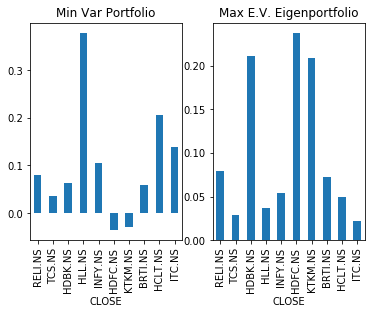

In [47]:
# Largest eigenvalue eigenportfolio
D, S = np.linalg.eigh(covariance_matrix)
eigenportfolio_1 = S[:,-1] / np.sum(S[:,-1]) # Normalize to sum to 1
eigenportfolio_largest = pd.DataFrame(data= eigenportfolio_1, columns = ['Investment Weight'], index = tickers)

# Plot
%matplotlib inline
import matplotlib.pyplot as plt
f = plt.figure()
ax = plt.subplot(121)
min_var_portfolio.plot(kind='bar', ax=ax, legend=False)
plt.title("Min Var Portfolio")
ax = plt.subplot(122)
eigenportfolio_largest.plot(kind='bar', ax=ax, legend=False)
plt.title("Max E.V. Eigenportfolio")
print(min_var_portfolio)

Text(0.5, 1.0, 'Eigenportfolio')

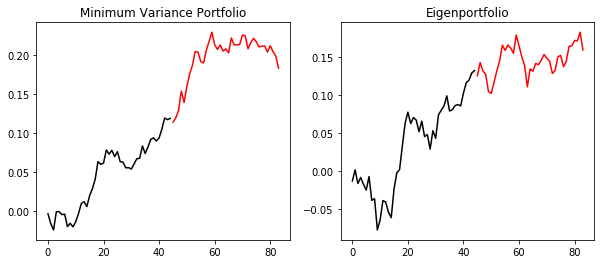

In [48]:
def get_cumulative_returns_over_time(sample, weights):
    return (((1+sample).cumprod(axis=0))-1).dot(weights)

in_sample_ind = np.arange(0, (returns.shape[0]-training_period+1))
out_sample_ind = np.arange((returns.shape[0]-training_period+1), returns.shape[0])

cumulative_returns = get_cumulative_returns_over_time(returns, min_var_portfolio).values
cumulative_returns_largest = get_cumulative_returns_over_time(returns, eigenportfolio_largest).values


f = plt.figure(figsize=(10,4))

ax = plt.subplot(121)
ax.plot(cumulative_returns[in_sample_ind], 'black')
ax.plot(out_sample_ind,cumulative_returns[out_sample_ind], 'r')
plt.title("Minimum Variance Portfolio")

ax = plt.subplot(122)
ax.plot(cumulative_returns_largest[in_sample_ind], 'black')
ax.plot(out_sample_ind,cumulative_returns_largest[out_sample_ind], 'r')
plt.title("Eigenportfolio")

